In [61]:
import pandas as pd
import numpy as np
import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import display
%matplotlib inline

In [2]:
# parser
def parser(file_path):    
    pattern = re.compile(r'\[([\d\.\s:]+)\]\s([\S]+).*:\s([\S\s]+)')
    timestamps = list()
    names = list()
    messages = list()
    with open(file_path, "r") as f:
        for count, line in enumerate(f):
    #         print(line)
    #         line = line.strip()
    #         print(line)
            parser = pattern.match(line)
            if parser:
                t = parser.group(1).strip()
                n = parser.group(2).strip()
                m = parser.group(3).strip()
                timestamps.append(t)
                names.append(n)
                messages.append(m)
            else:
                # there are multi line messages. those will be added to the previous message body.
#                 print("Could not parse the line: {}\t{}".format(count, line))
#                 m = messages.pop()
#                 m = m + "\n" + line.strip()
#                 messages.append(m)
                continue
        print("Parsed {} lines".format(count))
    chat = pd.DataFrame(np.column_stack([timestamps, names, messages]),
                        columns=["Raw_Time", "Name", "Message"])
    return chat

In [3]:
chat = parser("chat_data/bros_chat.txt")
chat["Date"] = chat["Raw_Time"].apply(lambda x: datetime.datetime.strptime(x.split(" ")[0], "%d.%m.%Y").strftime("%d.%m.%Y"))
chat["Time"] = chat["Raw_Time"].apply(lambda x: x.split(" ")[1])
chat["Timestamp"] = chat["Raw_Time"].apply(lambda x: datetime.datetime.timestamp(datetime.datetime.strptime(x.split(" ")[0], "%d.%m.%Y")))
chat.loc[chat[chat["Name"]=="\u202a+90"].index, "Name"] = "Halil"
chat = chat[chat.Name!="Bros"]
chat["Message_length"] = chat["Message"].apply(lambda x: len(x))

Parsed 162511 lines


In [40]:
chat.head()

Raw_Time   Name                                     Message  \
0  26.07.2015 19:34:13  Sabri  Gençler gökhandan ben kurmasını rica ettim   
1  26.07.2015 19:35:09  Seyda                                    Selamlar   
2  26.07.2015 19:36:22  Sabri                           Kısaca anlatayım;   
3  26.07.2015 19:36:49  Burak        Baslik sabri diye bagiriyor zaten :)   
4  26.07.2015 19:38:49  Seyda                                   Bangbros?   

         Date      Time     Timestamp  Message_length  
0  26.07.2015  19:34:13  1.437858e+09              42  
1  26.07.2015  19:35:09  1.437858e+09               8  
2  26.07.2015  19:36:22  1.437858e+09              17  
3  26.07.2015  19:36:49  1.437858e+09              36  
4  26.07.2015  19:38:49  1.437858e+09               9

In [97]:
chat_sorted = chat.sort_values(by="Message_length")
display(chat_sorted.head())
display(chat_sorted.tail())
print(chat.info(memory_usage="deep"))

Raw_Time    Name Message        Date      Time  \
12298   12.11.2015 14:22:15   Halil          12.11.2015  14:22:15   
152945  30.06.2018 11:30:22   Halit          30.06.2018  11:30:22   
77495   26.08.2016 16:02:20   Halit       👍  26.08.2016  16:02:20   
117047  29.07.2017 12:40:23  Gokhan       😂  29.07.2017  12:40:23   
95398    3.12.2016 18:45:27  Gokhan       😔  03.12.2016  18:45:27   

           Timestamp  Message_length  
12298   1.447279e+09               0  
152945  1.530306e+09               0  
77495   1.472159e+09               1  
117047  1.501276e+09               1  
95398   1.480712e+09               1

Raw_Time    Name  \
129671  15.02.2018 12:07:16   Burak   
89531    7.11.2016 12:54:00   Erdem   
71965   20.07.2016 00:08:26  Caglar   
32980   18.03.2016 23:55:40  Caglar   
48659   12.05.2016 03:11:24  Caglar   

                                                  Message        Date  \
129671  Bu bilgilere Nüfus müdürlüklerinden kolayca ul...  15.02.2018   
89531   Abi selam, biraz simdi anlatiyim kalani aksama...  07.11.2016   
71965   Adım Burak soyadım Kamerli.Ben sizin Spor Toto...  20.07.2016   
32980   En son ne anlattı, çocuk okuldan eve gelmiş şa...  18.03.2016   
48659   Beyler şimdi geldim eve, size içimi dökeyim ba...  12.05.2016   

            Time     Timestamp  Message_length  
129671  12:07:16  1.518642e+09             803  
89531   12:54:00  1.478466e+09            1044  
71965   00:08:26  1.468962e+09            2224  
32980   23:55:40  1.458252e+09            2518  
48659   03:11:24  1.463000e+09            4053

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156333 entries, 0 to 156333
Data columns (total 7 columns):
Raw_Time          156333 non-null object
Name              156333 non-null object
Message           156333 non-null object
Date              156333 non-null object
Time              156333 non-null object
Timestamp         156333 non-null float64
Message_length    156333 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 66.4 MB
None


In [98]:
names = chat.Name.unique()
print(names)

['Sabri' 'Seyda' 'Burak' 'Gokhan' 'Caglar' 'Halil' 'Halit' 'Ömer' 'Mehmet'
 'Yigit' 'Mustafa' 'Emre' 'Erdem' 'Alp']


### Messages of all time

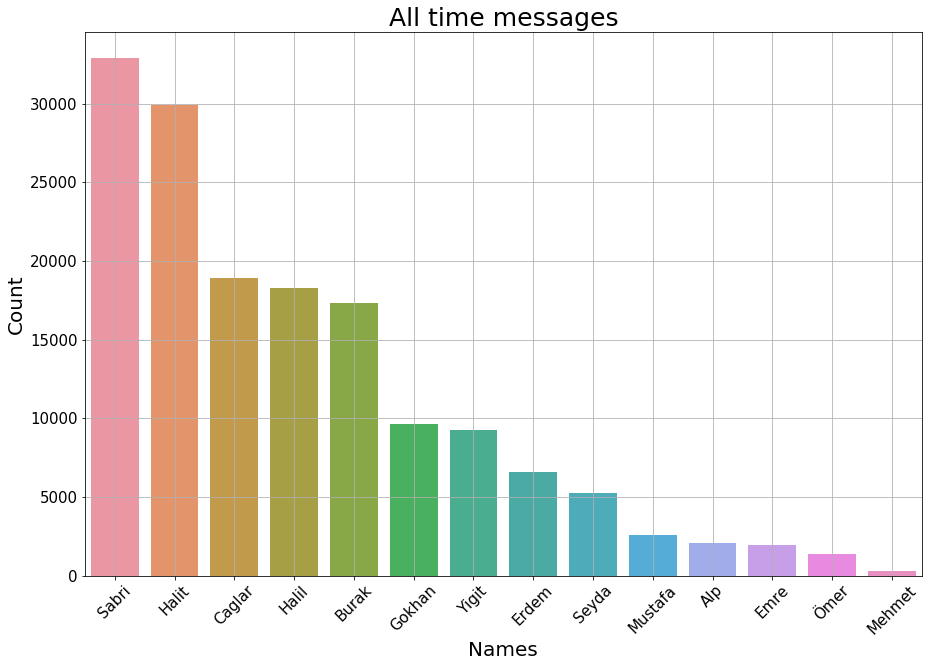

In [21]:
names_count = pd.DataFrame(chat.groupby(by="Name").count()["Date"]).rename(columns={"Date":"Count"}).sort_values(by="Count", ascending=False).reset_index()
plt.figure(figsize=(15, 10))
ax = sns.barplot(x="Name", y="Count", data=names_count)
ax.set_title("All time messages", fontsize=25)
ax.set_ylabel("Count", fontsize=20)
ax.set_xlabel("Names", fontsize=20)
ax.tick_params(axis="x", labelsize=15, labelrotation=45)
ax.tick_params(axis="y", labelsize=15)
ax.grid()
plt.savefig("chat_data/messages_by_names_all-time")

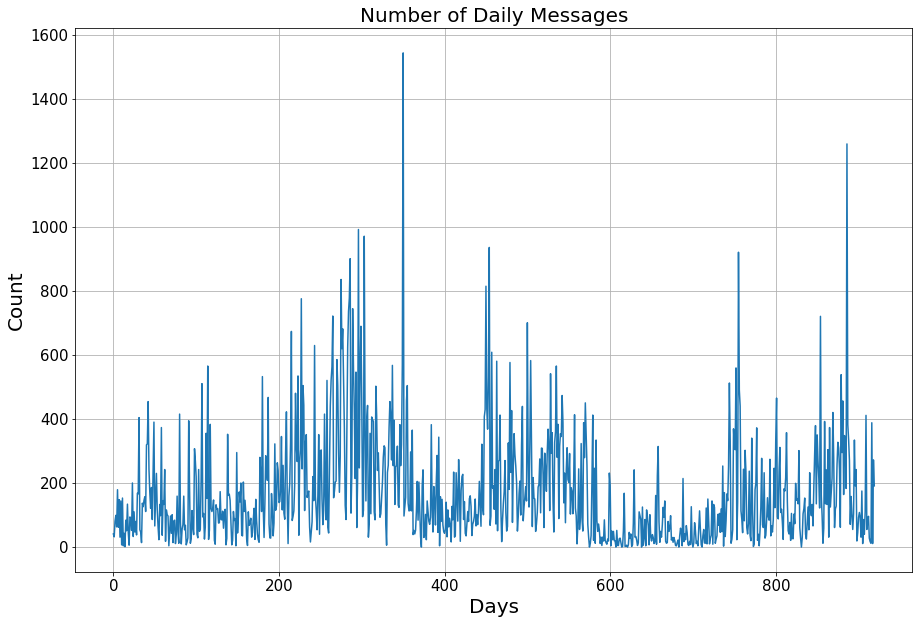

In [25]:
daily_count = pd.DataFrame(chat.groupby(by="Timestamp").count()["Raw_Time"]).rename(columns={"Raw_Time":"Count"}).reset_index()
plt.figure(figsize=(15, 10))
plt.plot(daily_count.Count)
xticks = chat.Date.unique().tolist()
# plt.xticks(np.arange(len(xticks)), xticks, rotation=45)
plt.title("Number of Daily Messages", fontsize=20)
plt.xlabel("Days", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.savefig("chat_data/messages_by_days")

### World Cloud

In [38]:
wordcloud.generate

200

Sabri
Seyda
Burak
Gokhan
Caglar
Halil
Halit
Ömer
Mehmet
Yigit
Mustafa
Emre
Erdem
Alp


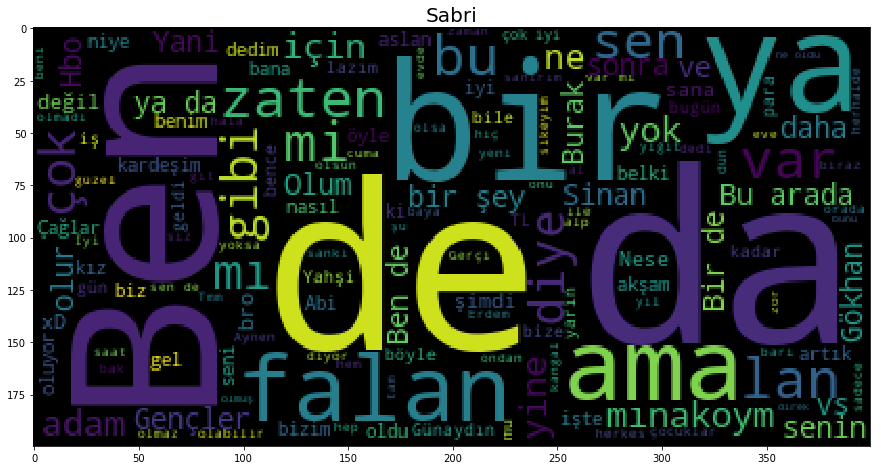

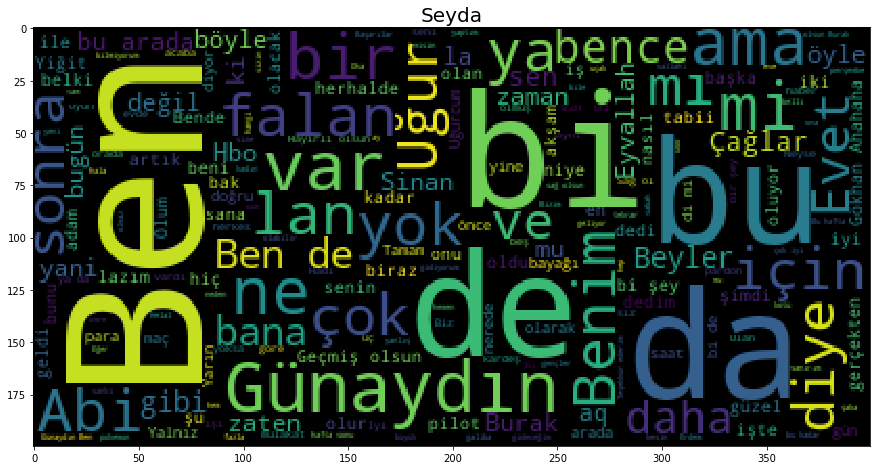

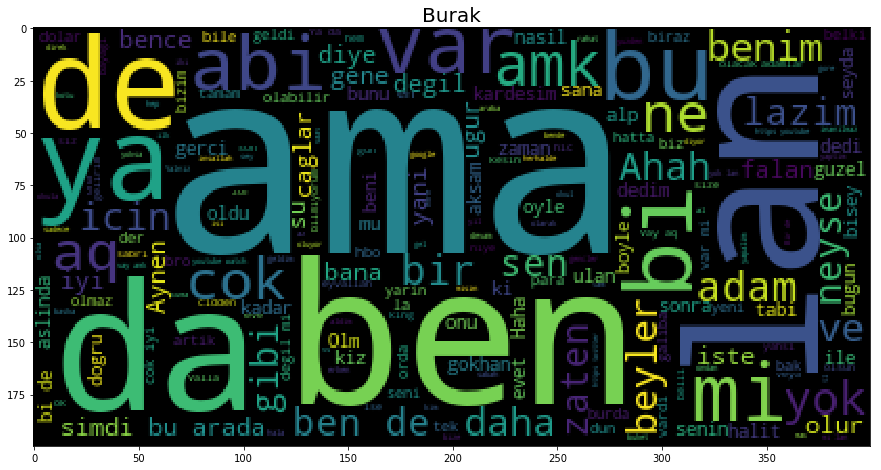

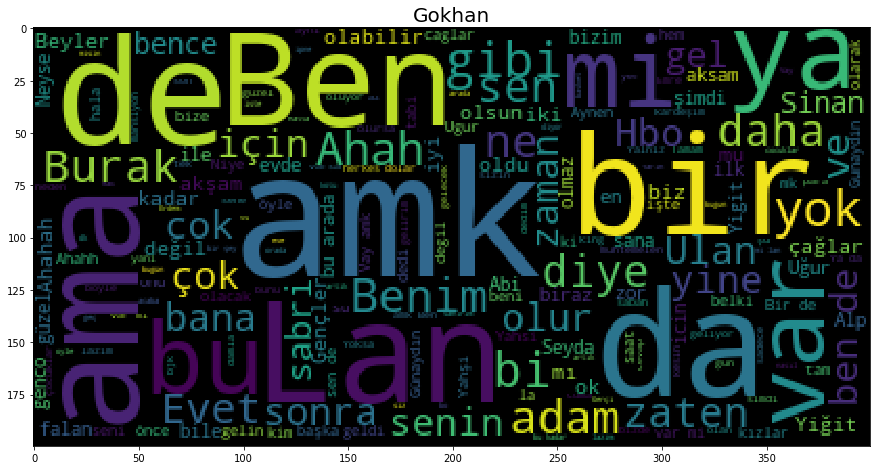

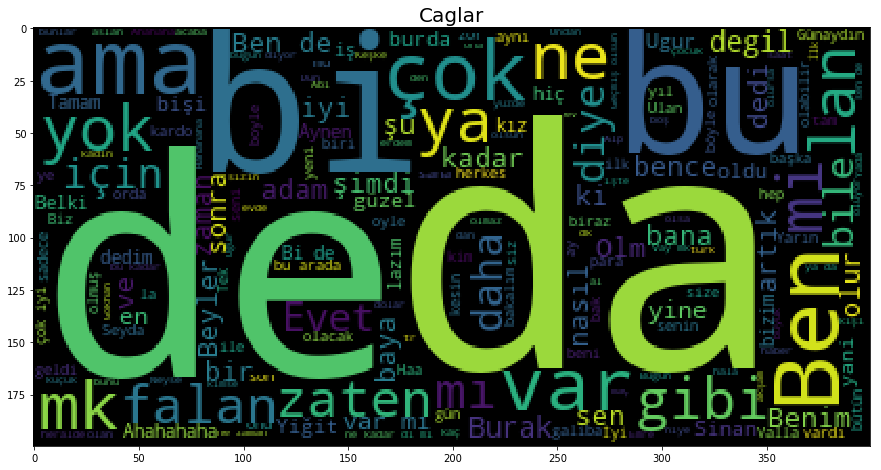

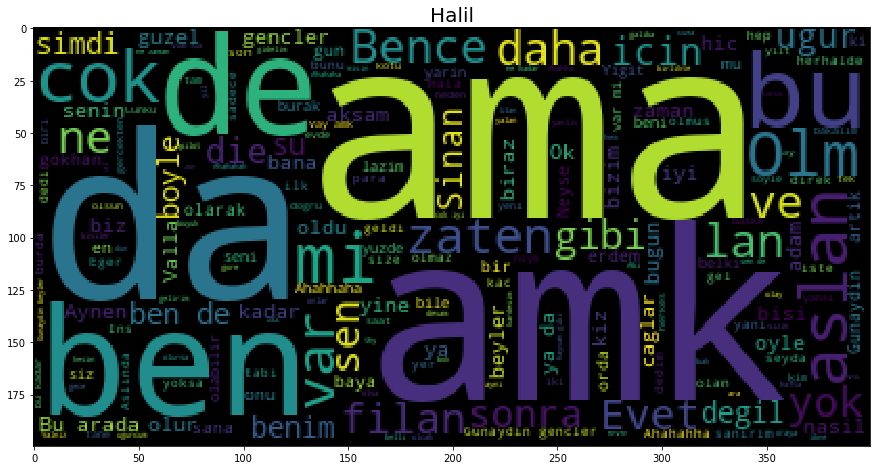

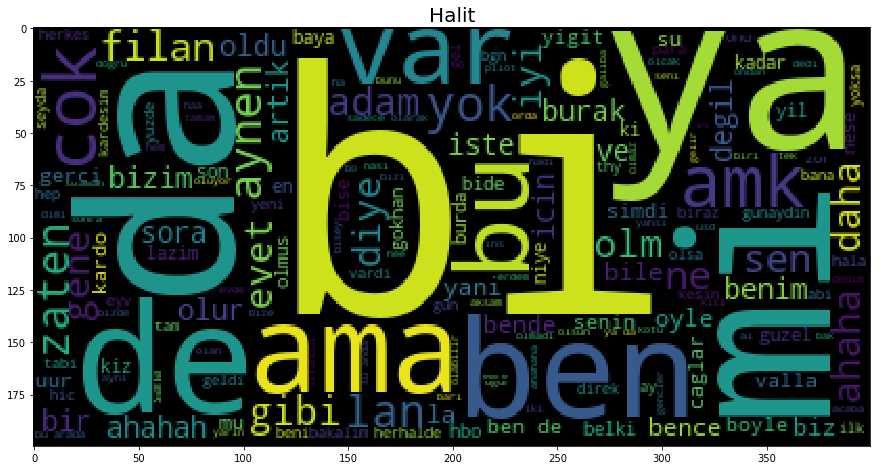

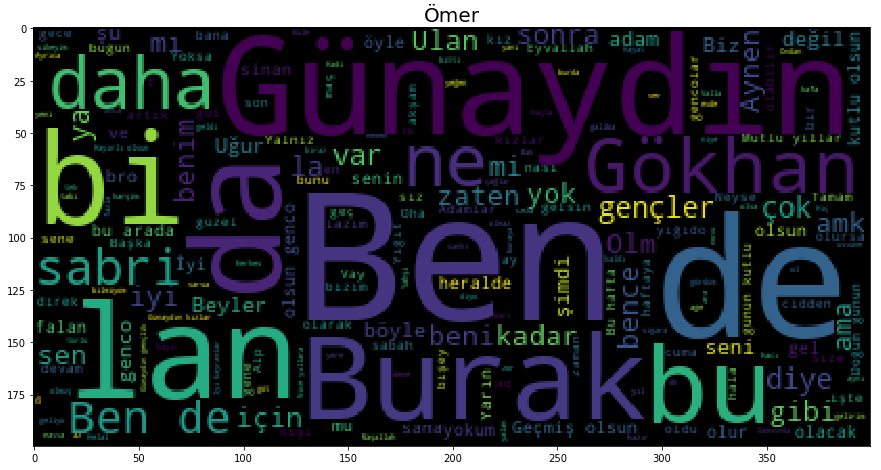

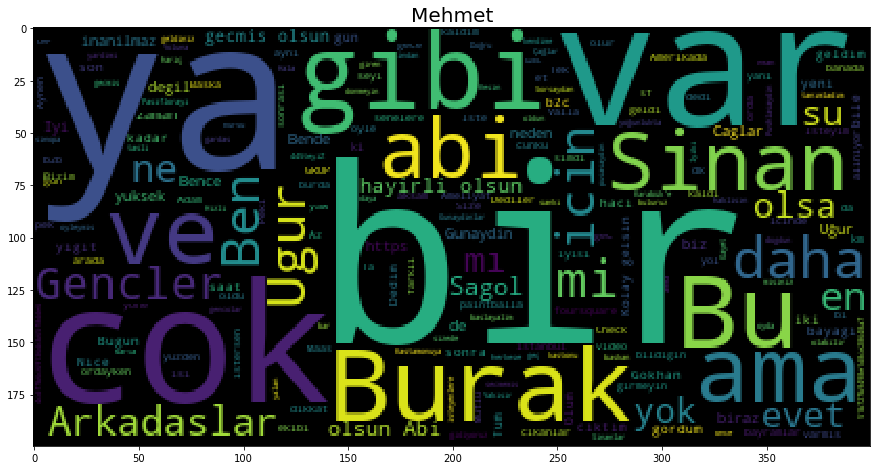

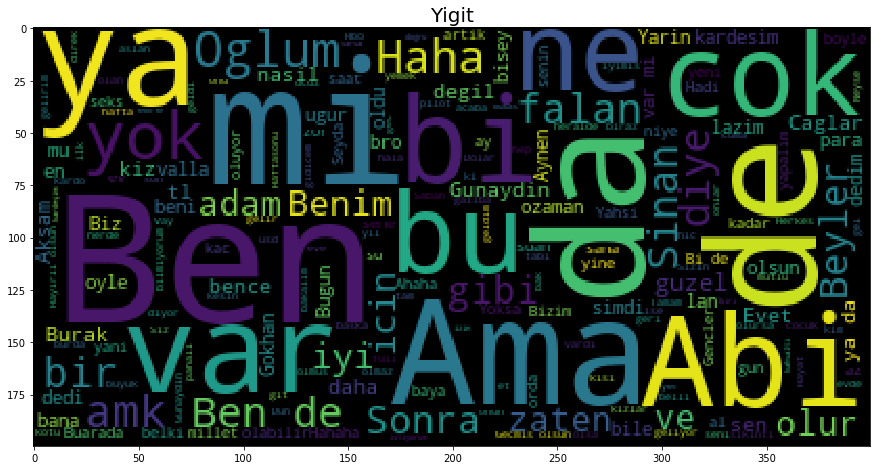

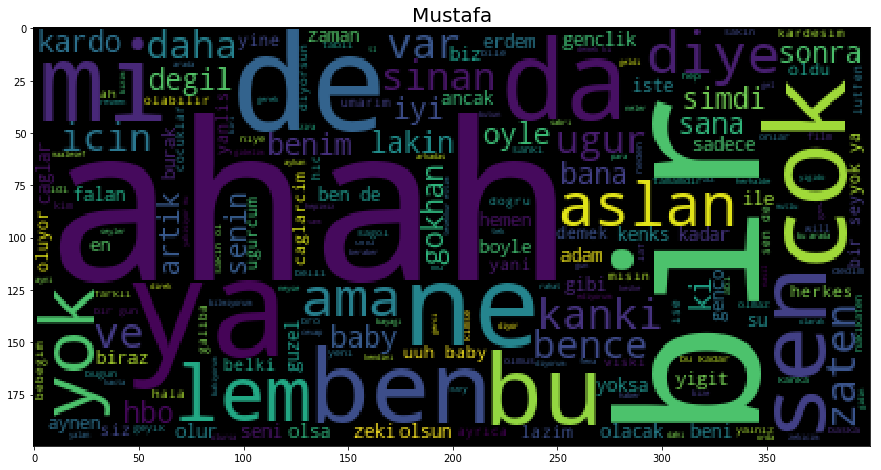

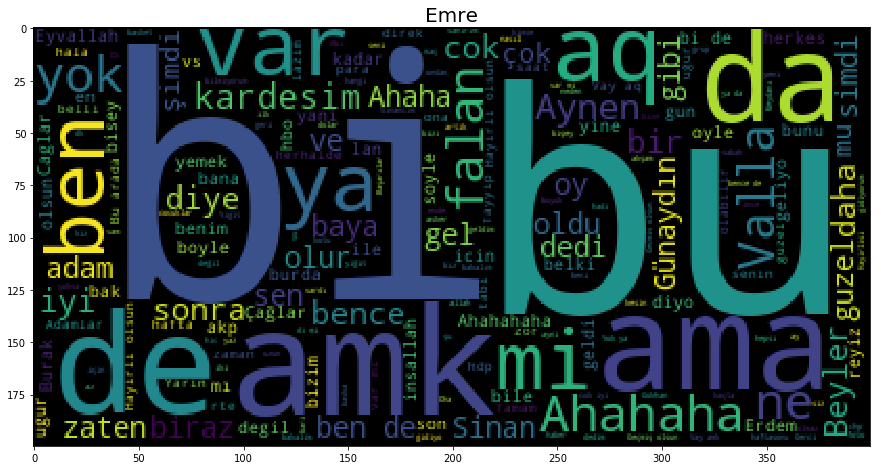

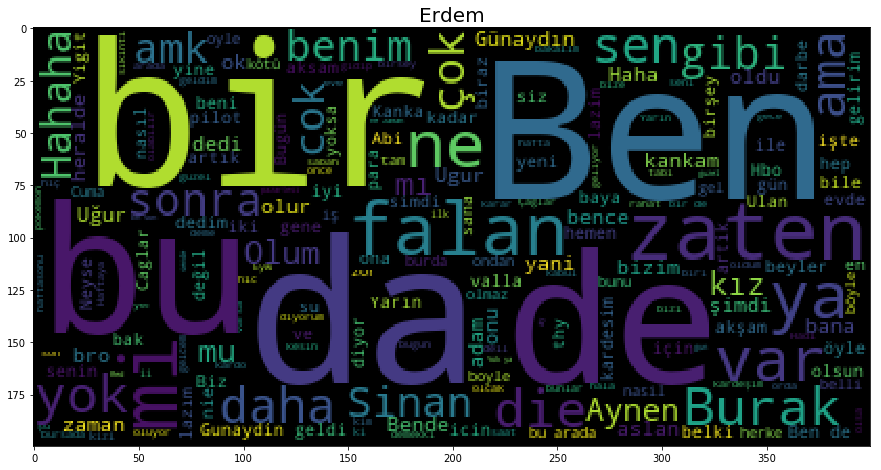

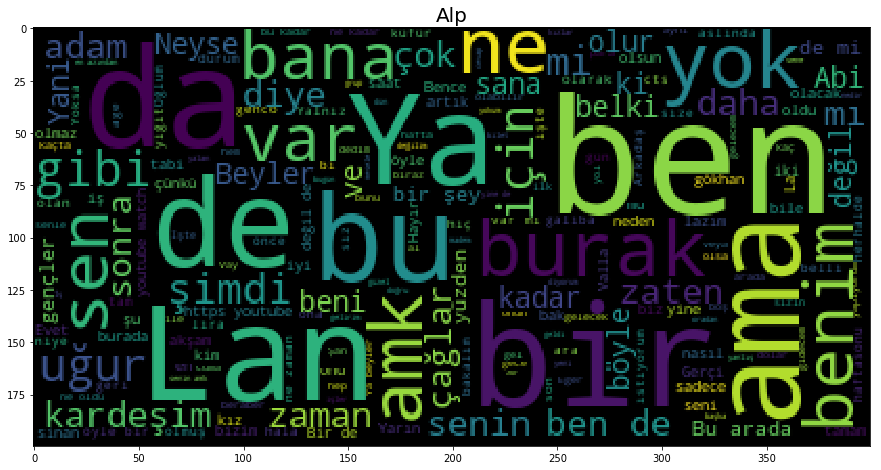

In [36]:
from wordcloud import WordCloud
for name in names:
    wordcloud = WordCloud().generate(' '.join(chat[chat["Name"]==name]["Message"]))
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.title("{}".format(name), fontsize=20)
    plt.axis("off")
    plt.savefig("chat_data/{}_word-cloud".format(name))

### Looking distinct words 

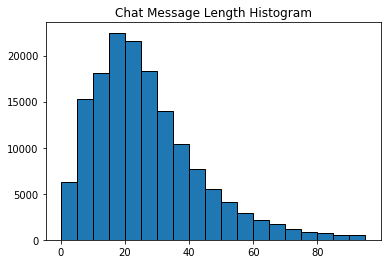

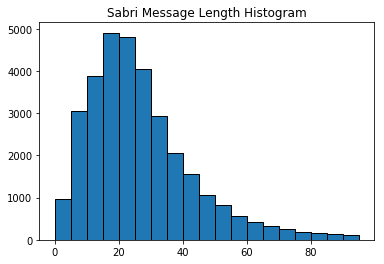

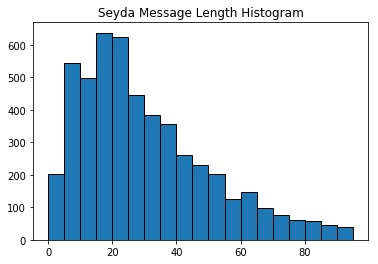

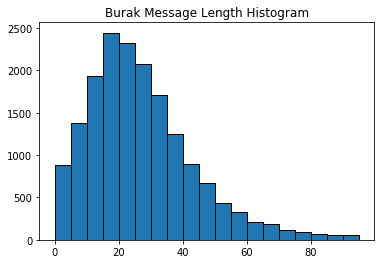

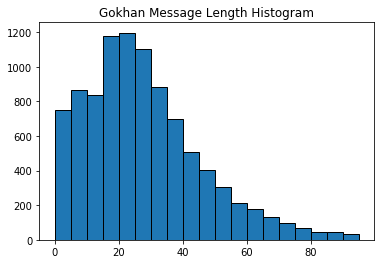

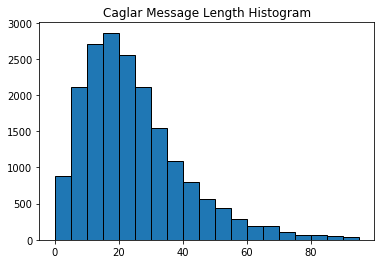

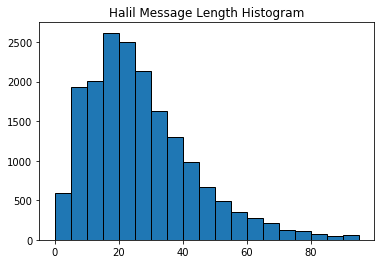

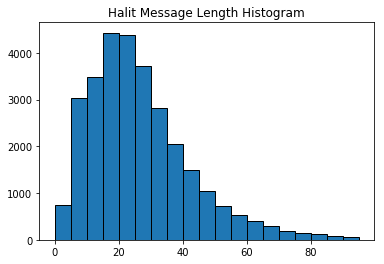

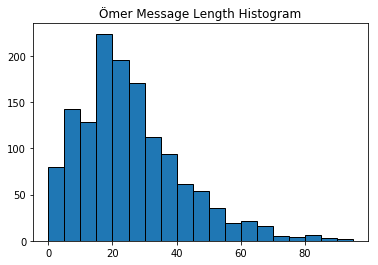

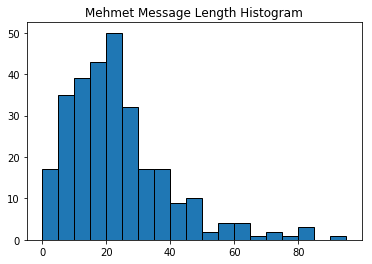

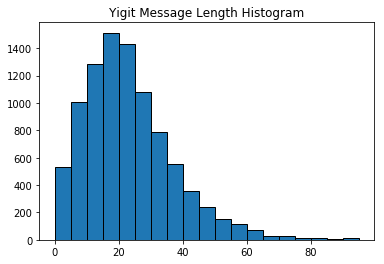

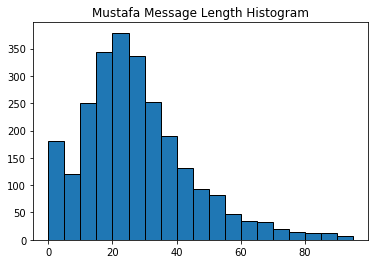

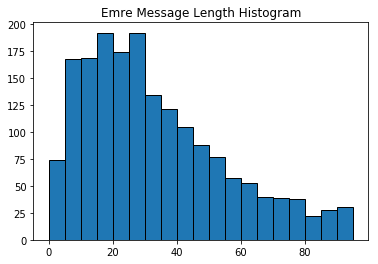

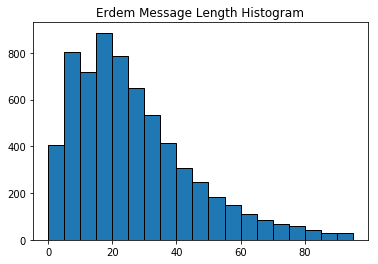

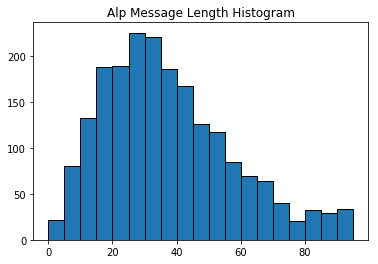

In [89]:
plt.figure()
chat_hist = plt.hist(chat["Message_length"], bins=range(0, 100, 5), edgecolor="k")
plt.title("Chat Message Length Histogram")
for name in names:
    plt.figure()
    hist = plt.hist(chat[chat["Name"]==name]["Message_length"], bins=range(0, 100, 5), edgecolor="k")
    plt.title("{} Message Length Histogram".format(name))

In [90]:
corpus = dict()
for name in names:
    corpus[name] = set(chat[chat["Name"] == name]["Message"].tolist())
unique_corpus = corpus.copy()
for name in names:
    for other in names:
        if other == name:
            continue
        unique_corpus[name] = unique_corpus[name] - unique_corpus[other]

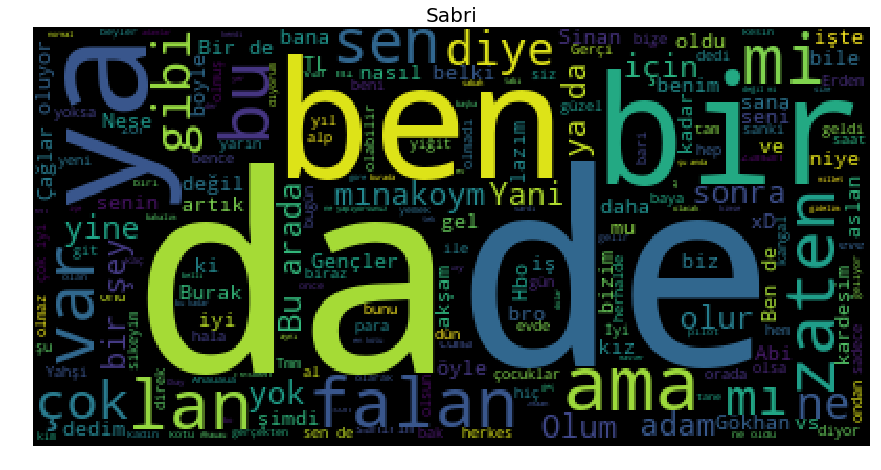

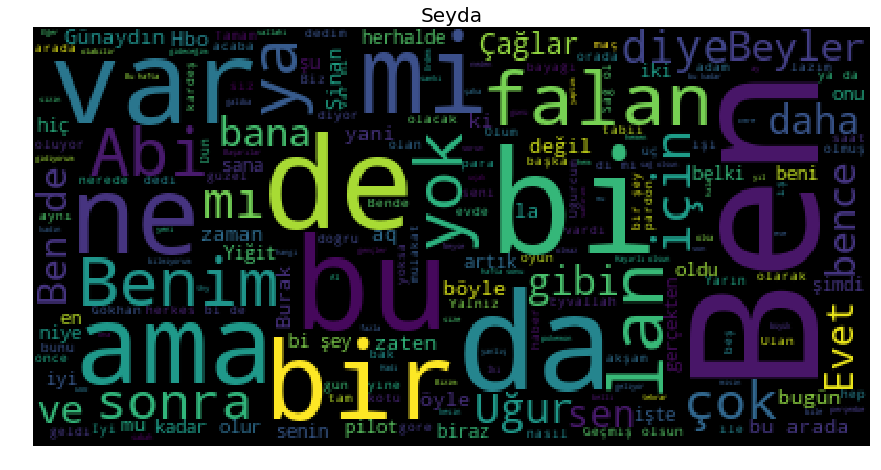

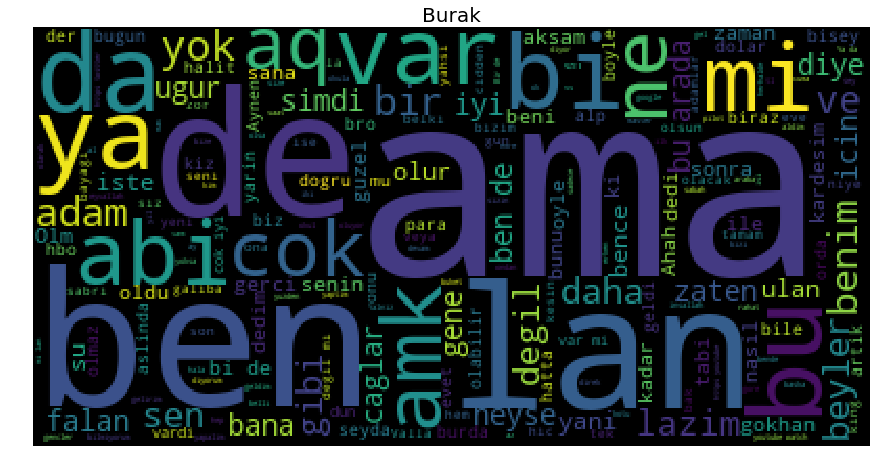

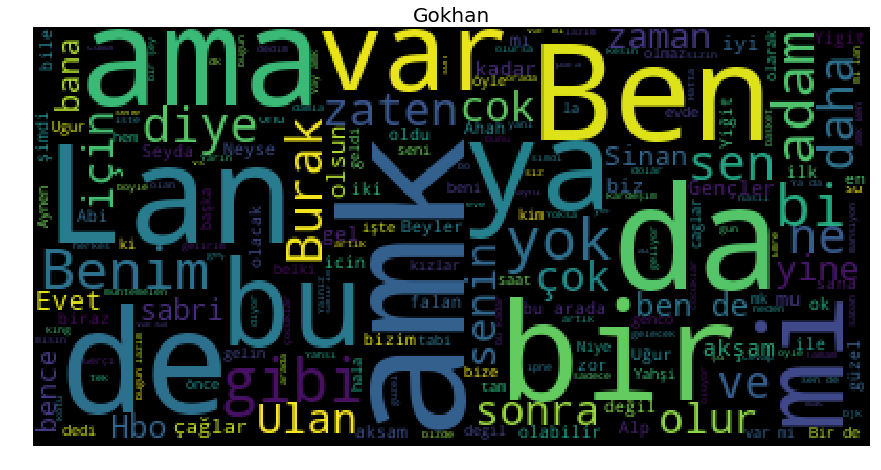

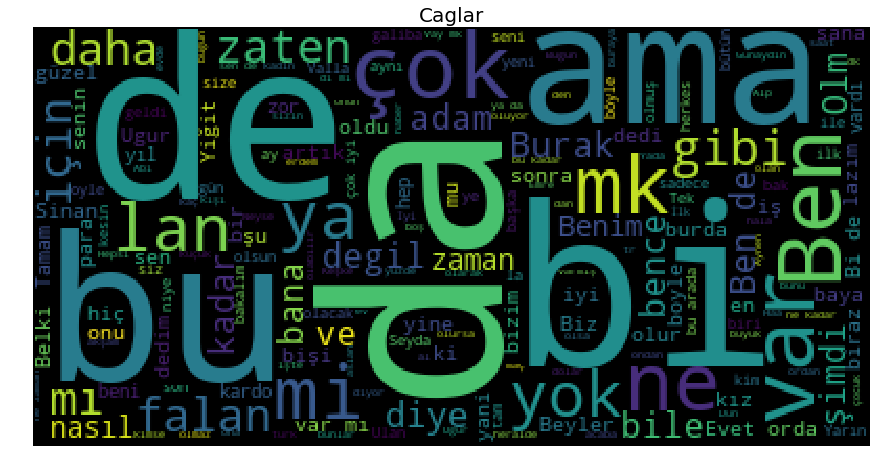

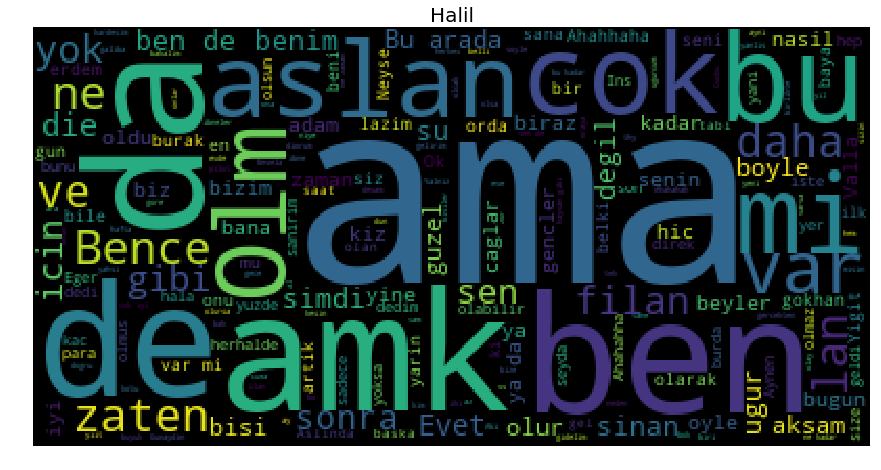

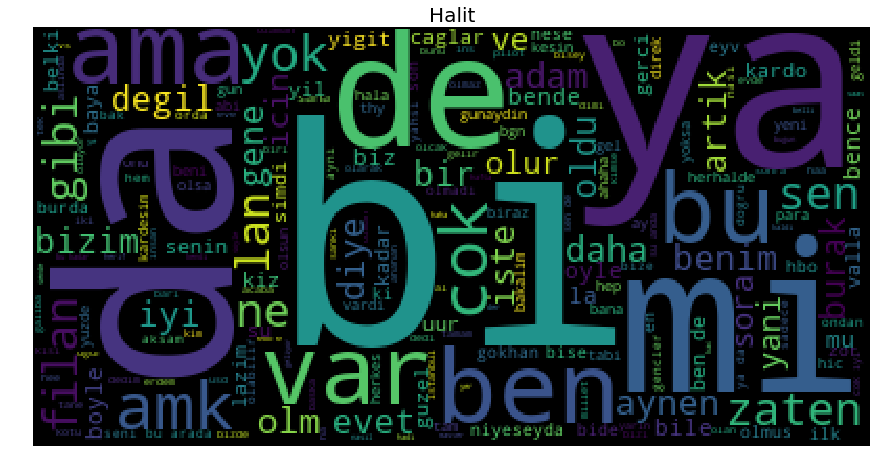

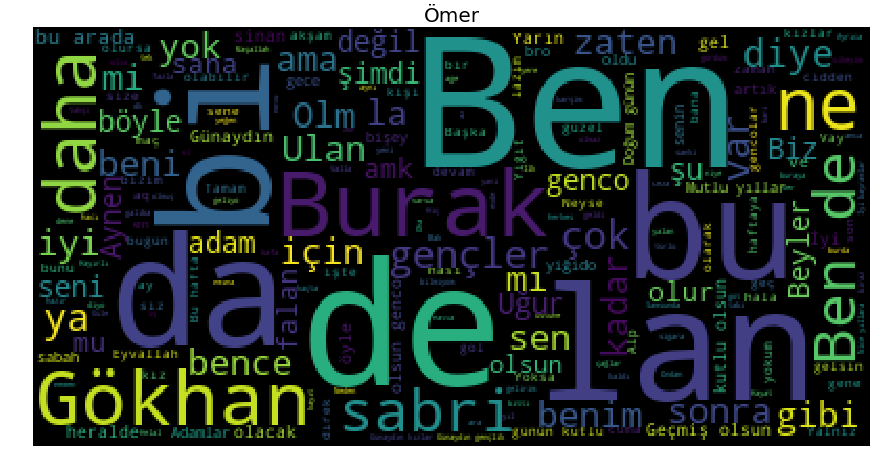

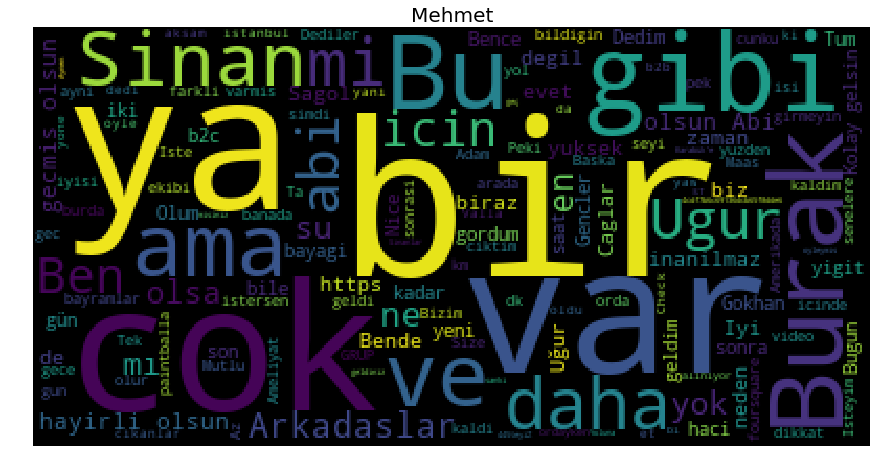

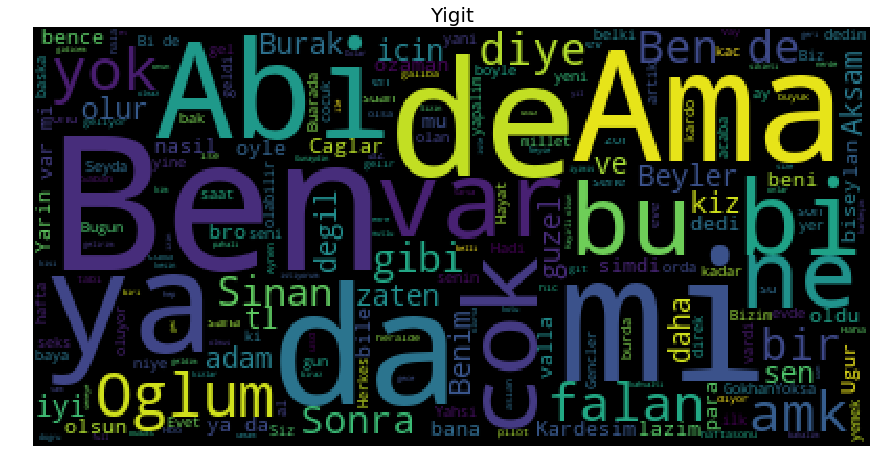

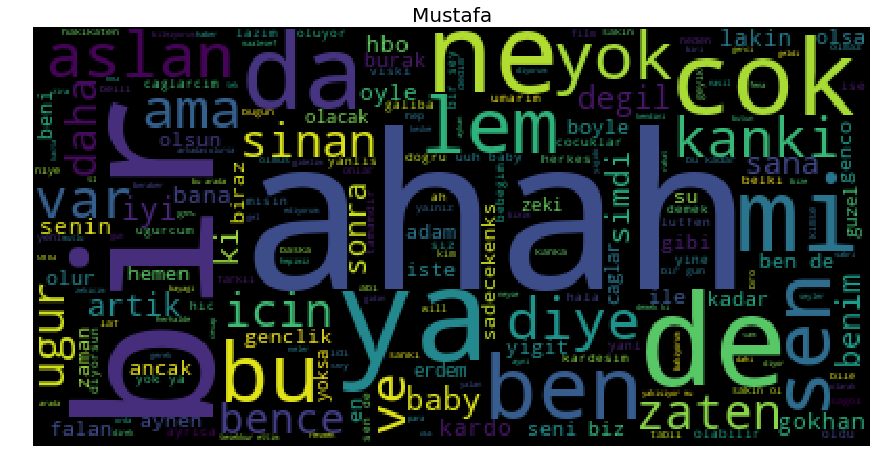

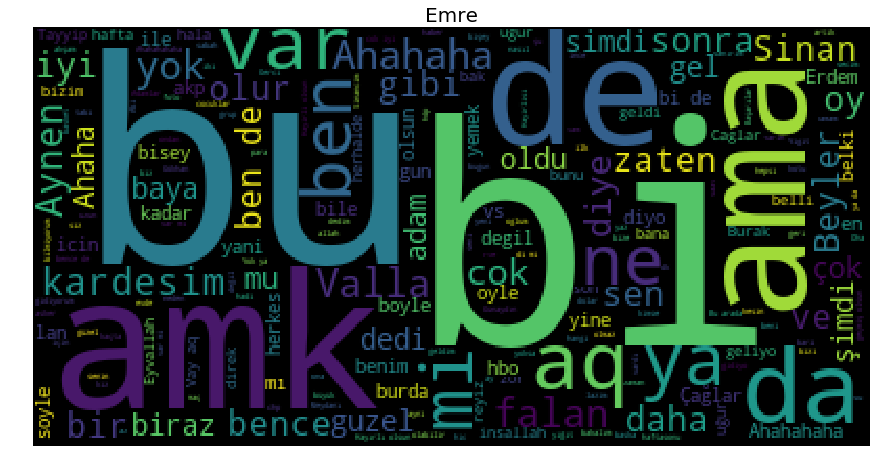

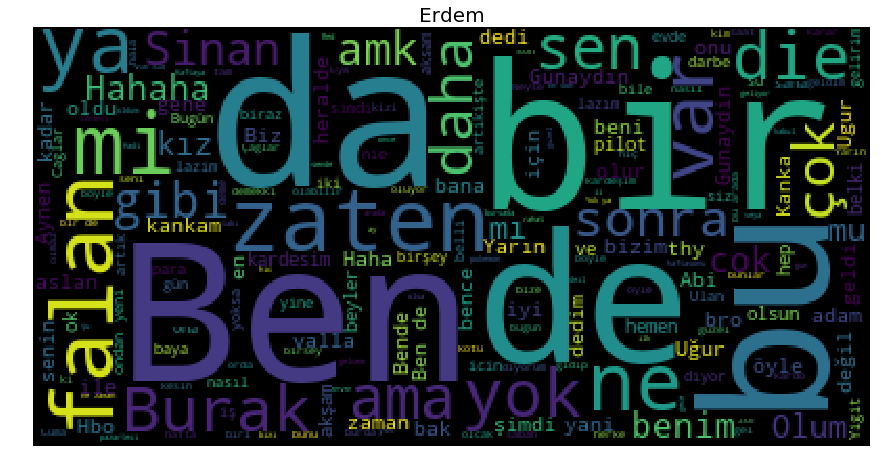

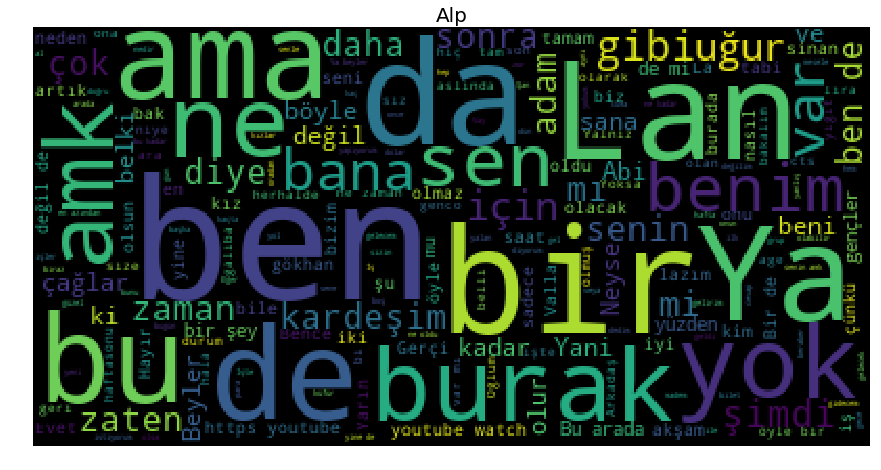

In [113]:
for name in names:
    wordcloud = WordCloud().generate(' '.join(chat[(chat["Name"]==name)&(chat["Message"].apply(lambda x: x in unique_corpus[name]))]["Message"]))
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud)
    plt.title("{}".format(name), fontsize=20)
    plt.axis("off")
    plt.savefig("chat_data/{}_unique_word-cloud".format(name))

In [112]:
chat[(chat["Name"]==name)&(chat["Message"].apply(lambda x: x in unique_corpus[name]))]["Message"]

0                Gençler gökhandan ben kurmasını rica ettim
2                                         Kısaca anlatayım;
5         Gençler cuma günü 5te yola çıkıyorum ben; kahv...
6         Ben hız sınırlarını geçmem, max 130 falan gidi...
10        Herkes çıkmadan kilometresine baksın, kilometr...
11                                            Evet seyda 😎😎
14        5te çıkmak isteyen varsa beraber de gidebiliri...
16        Nese kısaca böyle; büyük ihtimal ben ömerle yo...
17           Gökhan, sen bir kumdan kale yapsana kenarda ;)
18        Son olarak gökhan muhtemelen perşembe iş çıkış...
19                      O da başka bir alternatif olabilir,
21                                            Vaz mı geçtin
23                                          Pardon o zaman,
27        Benim işten 8den önce çıkma ihtimalim yok zate...
29                           1 için 6 da falan çıkmak lazım
31                      Gece kapalı olur yiyemezsin zTen ;)
33        Gökhancığım ben 11 gibi hep dö

In [114]:
unique_corpus["Burak"]

{'app lazim bana',
 'eskiden buralar dutluktu falan diyebilirsin ama klise',
 'Sure?',
 'Yoksa negotiable mi',
 'Karabukten gecmeyecegiz',
 "yandex'in amk tatil tatil aklima getirme :D",
 "Sinan deutsche'de sen su raporlari mi yaziodun",
 "Yandex'ten bir arkadasin evinde 5-6 ayligina yer aciliyor subatta",
 'Pro almis bir de',
 'Sistemsel sikmek budur iste',
 'Yarin geleyim mansiona',
 'neden olmadi? kimler yazdi?',
 'lan apronu bana gezdirebiliyor musunuz',
 'Merak ediyorum',
 'dogru abi',
 'Ordu hayvan gibi yerlessin oraya',
 'bu teklif subat-agustos icin gecerli yani',
 'Berdo iyi adamdi ama tam almandi',
 'Nasil oldun duzeldin mi',
 'Boyle sikko bi durum',
 'Maas ve bonusumu alarak ciktim',
 'Sonra kafayi yiyip camdan masayi asagi atacagim',
 'yok iste amk sen istemiosun',
 'Mersin izmir',
 'Amerikaya donerse burda dolar artmaz mi',
 'Hicbi anlami yok burda yasamanin',
 'Adam oldurmeye tesebbus, penalti degil demisti',
 'Stadi i tek basina bi fenerbahce yapti',
 'commercial tarafta